In [206]:
import numpy as np
import pandas as pd
import os
import matplotlib as plt
import scipy as sp
%matplotlib inline
from scipy import stats
import datetime
from datetime import timedelta

In [4]:
responses1 = pd.read_csv('data/Responses/responsesP1(Jan-Feb).csv')
responses2 = pd.read_csv('data/Responses/responsesP2(Mar-Apr).csv')
responses3 = pd.read_csv('data/Responses/responsesP3(May-Jun).csv')
responses4 = pd.read_csv('data/Responses/responsesP4(Jul-Aug).csv')
responses5 = pd.read_csv('data/Responses/responsesP5(Sep-Oct).csv')
responses6 = pd.read_csv('data/Responses/responsesP6(Nov-Dec).csv')

responses1.head()

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,callconcluded,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed
0,20171230002615,2615,113994778,22344,2017-12-30 13:16:22.000,2017-12-30 16:44:14.000,2017-12-30 16:53:43.000,NaN,NaN,2017-12-30 17:52:24.000,...,2017-12-30 13:25:37.000,555.0,0,0,C3,26.0,Sick Person (Specific Diagnosis),9012,0,0
1,20171230002616,2616,-144037,19621,2017-12-30 13:16:40.000,2017-12-30 16:54:00.000,2017-12-30 17:09:00.000,2017-12-30 17:17:00.000,2017-12-30 17:30:00.000,2017-12-30 18:00:00.000,...,2017-12-30 13:23:53.000,433.0,0,0,C5,26.0,Sick Person (Specific Diagnosis),394,1,1
2,20171230002617,2617,113993868,23331,2017-12-30 13:16:46.000,2017-12-30 13:21:03.000,2017-12-30 13:28:52.000,NaN,NaN,2017-12-30 14:15:11.000,...,2017-12-30 13:19:47.000,181.0,0,0,C2,31.0,Unconscious / Fainting (Near),277,1,0
3,20171230002617,2617,113994056,22774,2017-12-30 13:16:46.000,2017-12-30 13:46:57.000,NaN,NaN,NaN,2017-12-30 13:47:26.000,...,2017-12-30 13:19:47.000,181.0,0,0,C2,31.0,Unconscious / Fainting (Near),277,1,0
4,20171230002617,2617,113994057,23258,2017-12-30 13:16:46.000,2017-12-30 13:47:41.000,2017-12-30 13:57:57.000,2017-12-30 14:14:47.000,2017-12-30 14:30:20.000,2017-12-30 15:15:57.000,...,2017-12-30 13:19:47.000,181.0,0,0,C2,31.0,Unconscious / Fainting (Near),277,1,0


In [38]:
incidents1 = pd.read_csv('data/Incidents/incidentsQ1.csv')
incidents2 = pd.read_csv('data/Incidents/incidentsQ2.csv')
incidents3 = pd.read_csv('data/Incidents/incidentsQ3.csv')
incidents4 = pd.read_csv('data/Incidents/incidentsQ4.csv')

""


In [41]:
incidents = pd.DataFrame()
incidents = incidents.append(incidents1).append(incidents2).append(incidents3).append(incidents4)

In [44]:
responses = pd.DataFrame()
responses = responses.append(responses1).append(responses2).append(responses3).append(responses4).append(responses5).append(responses6)

In [45]:
responses.shape

(1959727, 43)

In [82]:
# If "arrived at scene" is null, that means the initial dispatch assignment 
# was cancelled and another vehicle was assigned - should drop (~570k)
responses.dropna(subset = ['arrivedatscene'],inplace=True)
responses.shape

(1389287, 43)

In [92]:
#sanity check - this combination should return no results
responses[responses['arrivedathospital'].isnull() & responses['tohospital'].notnull()]

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,callconcluded,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed


In [101]:
responses[responses['callsignkey']==22407].sort_values(['dispatch'])

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,callconcluded,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed
3046,20171230001646,1646,113993079,22407,2017-12-30 09:57:57.000,2017-12-30 10:02:58.000,2017-12-30 10:17:15.000,2017-12-30 10:52:43.000,2017-12-30 10:58:02.000,2017-12-30 12:16:26.000,...,2017-12-30 10:01:28.000,212.0,0,0,C2,6.0,Breathing Problems,149,1,1
4696,20171230002361,2361,113993704,22407,2017-12-30 12:26:57.000,2017-12-30 12:32:09.000,2017-12-30 12:38:31.000,NaN,NaN,2017-12-30 14:22:08.000,...,2017-12-30 12:30:56.000,239.0,0,0,C2,17.0,Falls,9021,0,0
21,20171230002634,2634,113994194,22407,2017-12-30 13:20:31.000,2017-12-30 14:27:13.000,2017-12-30 14:38:00.000,2017-12-30 15:28:37.000,2017-12-30 15:50:11.000,2017-12-30 18:23:00.000,...,2017-12-30 13:25:53.000,322.0,0,0,C3,17.0,Falls,176,1,1
7793,20171230004996,4996,113995867,22407,2017-12-30 20:34:01.000,2017-12-30 20:41:38.000,2017-12-30 20:51:29.000,2017-12-30 21:47:00.000,2017-12-30 21:58:45.000,2017-12-30 21:59:14.000,...,2017-12-30 20:42:16.000,495.0,0,0,C2,32.0,Unknown Problem (Person Down),9003,1,0
11403,20171231001781,7705,113998732,22407,2017-12-31 09:59:23.000,2017-12-31 10:03:16.000,2017-12-31 10:12:28.000,2017-12-31 11:33:09.000,2017-12-31 11:51:04.000,2017-12-31 13:12:45.000,...,2017-12-31 10:04:21.000,340.0,0,0,C2,17.0,Falls,176,1,1
9744,20171231002536,8460,113999400,22407,2017-12-31 12:41:47.000,2017-12-31 13:13:00.000,2017-12-31 13:16:12.000,2017-12-31 13:42:22.000,2017-12-31 13:48:56.000,2017-12-31 14:07:03.000,...,NaN,NaN,0,0,C2,111.0,NHS 111 Transfer,176,1,1
8758,20171231002902,8826,113999638,22407,2017-12-31 13:48:54.000,2017-12-31 14:08:07.000,2017-12-31 14:26:31.000,2017-12-31 15:05:28.000,2017-12-31 15:13:08.000,2017-12-31 15:40:21.000,...,2017-12-31 13:52:58.000,482.0,0,0,C2,10.0,Chest Pain / Chest Discomfort (Non-Traumatic,149,1,1
17814,20180101002936,14469,114004836,22407,2018-01-01 10:02:08.000,2018-01-01 10:04:24.000,2018-01-01 10:10:26.000,2018-01-01 10:56:00.000,2018-01-01 11:16:06.000,2018-01-01 12:31:48.000,...,2018-01-01 10:08:26.000,378.0,0,0,C2,31.0,Unconscious / Fainting (Near),149,1,1
13797,20180101003268,14801,114005586,22407,2018-01-01 11:11:20.000,2018-01-01 12:32:12.000,2018-01-01 12:42:33.000,2018-01-01 13:21:52.000,2018-01-01 13:35:17.000,2018-01-01 14:05:04.000,...,NaN,NaN,0,0,C2,111.0,NHS 111 Transfer,1513,1,0
12129,20180101004165,15698,114005958,22407,2018-01-01 14:03:21.000,2018-01-01 14:06:00.000,2018-01-01 14:12:38.000,2018-01-01 14:42:37.000,2018-01-01 14:56:01.000,2018-01-01 16:16:11.000,...,2018-01-01 14:06:40.000,212.0,0,0,C2,10.0,Chest Pain / Chest Discomfort (Non-Traumatic,149,1,1


In [125]:
vehicleIDs = responses.callsignkey.unique()
df = pd.DataFrame()
df = df.append(responses[responses['callsignkey']==22344].sort_values(['dispatch']))

(1066, 43)

In [147]:
#calculate idle time between greentime and next dispatch
df = responses[responses['callsignkey']==19621].sort_values(['dispatch'])
df[["callstart", "dispatch", "arrivedatscene", "leftscene","arrivedathospital","greentime"]
  ] = df[["callstart", "dispatch", "arrivedatscene","leftscene",
                        "arrivedathospital","greentime"]].apply(pd.to_datetime)
df['idleTime'] = df['dispatch'] - df['greentime'].shift(1)
df.head(50)

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed,idleTime
9016,20171230002099,2099,-144021,19621,2017-12-30 11:34:15,2017-12-30 12:05:00,2017-12-30 12:45:00,2017-12-30 13:17:00,2017-12-30 13:36:00,2017-12-30 16:03:00,...,364.0,0,0,C4,35.0,Health Care Professional Admission,867,1,1,NaT
1,20171230002616,2616,-144037,19621,2017-12-30 13:16:40,2017-12-30 16:54:00,2017-12-30 17:09:00,2017-12-30 17:17:00,2017-12-30 17:30:00,2017-12-30 18:00:00,...,433.0,0,0,C5,26.0,Sick Person (Specific Diagnosis),394,1,1,0 days 00:51:00
658,20171230004220,4220,-144028,19621,2017-12-30 18:14:00,2017-12-30 19:00:00,2017-12-30 19:09:00,2017-12-30 19:35:00,2017-12-30 19:41:00,2017-12-30 20:01:00,...,230.0,0,0,C4,35.0,Health Care Professional Admission,394,1,1,0 days 01:00:00
3427,20171230004637,4637,-144074,19621,2017-12-30 19:25:13,2017-12-30 20:15:00,2017-12-30 20:28:00,2017-12-30 20:49:00,2017-12-30 21:02:00,2017-12-30 21:44:00,...,292.0,0,0,C4,35.0,Health Care Professional Admission,867,1,1,0 days 00:14:00
2104,20171230005208,5208,-144007,19621,2017-12-30 21:15:29,2017-12-30 22:00:00,2017-12-30 22:11:00,2017-12-30 22:36:00,2017-12-30 22:40:00,2017-12-30 23:34:00,...,230.0,0,0,C5,21.0,Haemorrhage / Lacerations,488,1,1,0 days 00:16:00
9590,20171231002181,8105,-144146,19621,2017-12-31 11:26:38,2017-12-31 12:06:00,2017-12-31 12:28:00,2017-12-31 12:48:00,2017-12-31 13:11:00,2017-12-31 13:34:00,...,NaN,0,0,C4,35.0,Health Care Professional Admission,1065,1,0,0 days 12:32:00
8470,20171231002354,8278,-144106,19621,2017-12-31 12:06:19,2017-12-31 13:34:00,2017-12-31 14:13:00,2017-12-31 14:36:00,2017-12-31 14:58:00,2017-12-31 15:22:00,...,220.0,0,0,C4,35.0,Health Care Professional Admission,737,1,1,0 days 00:00:00
11556,20171231001928,7852,-144096,19621,2017-12-31 10:36:57,2017-12-31 15:23:00,2017-12-31 15:42:00,2017-12-31 16:05:00,2017-12-31 16:25:00,2017-12-31 16:49:00,...,NaN,0,0,C4,111.0,NHS 111 Transfer,737,1,1,0 days 00:01:00
6893,20171231004289,10213,-144158,19621,2017-12-31 18:20:27,2017-12-31 18:41:00,2017-12-31 19:00:00,2017-12-31 19:27:00,2017-12-31 19:41:00,2017-12-31 20:08:00,...,NaN,0,0,C3,111.0,NHS 111 Transfer,737,1,1,0 days 01:52:00
6966,20171231004376,10300,-144141,19621,2017-12-31 18:37:48,2017-12-31 20:13:00,2017-12-31 20:20:00,2017-12-31 20:47:00,2017-12-31 20:54:00,2017-12-31 21:23:00,...,NaN,0,0,C3,0.0,_unknown,737,1,1,0 days 00:05:00


In [152]:
df.shape

(8105, 44)

In [155]:
#calculate idle time between greentime and next dispatch

vehicleIDs = responses.callsignkey.unique()
df = pd.DataFrame()

for key in vehicleIDs:
    #print(key)
    df_temp = responses[responses['callsignkey']==key].sort_values(['dispatch'])
    df_temp[["callstart", "dispatch", "arrivedatscene", "leftscene","arrivedathospital",
             "greentime"]] = df_temp[["callstart", "dispatch", "arrivedatscene","leftscene",
                                 "arrivedathospital","greentime"]].apply(pd.to_datetime)
    df_temp['idleTime'] = df_temp['dispatch'] - df_temp['greentime'].shift(1)
    df = df.append(df_temp)
    
df.shape

(1389287, 44)

In [157]:
df.to_csv('responsesWithIdleTime.csv')

In [158]:
df.head()

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed,idleTime
4411,20171230001230,1230,113992612,22344,2017-12-30 08:03:31,2017-12-30 08:08:51,2017-12-30 08:18:55,NaT,NaT,2017-12-30 09:00:28,...,979.0,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1,NaT
1745,20171230001812,1812,113993153,22344,2017-12-30 10:38:26,2017-12-30 10:42:50,2017-12-30 10:50:11,NaT,NaT,2017-12-30 11:31:43,...,428.0,0,0,C2,29.0,Traffic / Transportation Incidents,184,1,0,01:42:22
11021,20171230002065,2065,113993403,22344,2017-12-30 11:29:50,2017-12-30 11:32:03,2017-12-30 11:43:12,NaT,NaT,2017-12-30 13:16:37,...,224.0,0,0,C2,6.0,Breathing Problems,737,1,1,00:00:20
7535,20171230002819,2819,113994138,22344,2017-12-30 13:50:48,2017-12-30 14:15:12,2017-12-30 14:18:53,NaT,NaT,2017-12-30 14:55:59,...,1867.0,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1,00:58:35
323,20171230003206,3206,113994327,22344,2017-12-30 15:00:03,2017-12-30 15:03:35,2017-12-30 15:10:46,NaT,NaT,2017-12-30 15:32:03,...,353.0,0,0,C1,24.0,Pregnancy / Childbirth / Miscarriage,1574,1,0,00:07:36


In [202]:
#filter shift changes
df_regHours = df[df['callstart'].dt.hour>5]

a = datetime.timedelta(hours=10)
df_regHours = df[df['idleTime']<a]

In [204]:
df_regHours['idleTime'].median()

Timedelta('0 days 00:04:30')

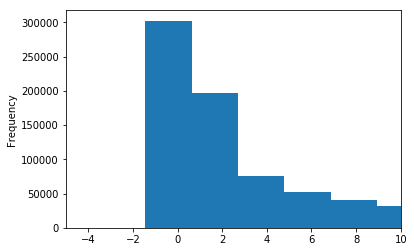

In [223]:
(df_regHours['idleTime'] / pd.Timedelta(minutes=1)).plot.hist(bins=1000, xlim=(-5,10))

In [97]:
responses[responses['callsignkey']==22344]

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,callconcluded,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed
0,20171230002615,2615,113994778,22344,2017-12-30 13:16:22.000,2017-12-30 16:44:14.000,2017-12-30 16:53:43.000,NaN,NaN,2017-12-30 17:52:24.000,...,2017-12-30 13:25:37.000,555.0,0,0,C3,26.0,Sick Person (Specific Diagnosis),9012,0,0
323,20171230003206,3206,113994327,22344,2017-12-30 15:00:03.000,2017-12-30 15:03:35.000,2017-12-30 15:10:46.000,NaN,NaN,2017-12-30 15:32:03.000,...,2017-12-30 15:05:04.000,353.0,0,0,C1,24.0,Pregnancy / Childbirth / Miscarriage,1574,1,0
1745,20171230001812,1812,113993153,22344,2017-12-30 10:38:26.000,2017-12-30 10:42:50.000,2017-12-30 10:50:11.000,NaN,NaN,2017-12-30 11:31:43.000,...,2017-12-30 10:45:34.000,428.0,0,0,C2,29.0,Traffic / Transportation Incidents,184,1,0
4411,20171230001230,1230,113992612,22344,2017-12-30 08:03:31.000,2017-12-30 08:08:51.000,2017-12-30 08:18:55.000,NaN,NaN,2017-12-30 09:00:28.000,...,2017-12-30 08:19:50.000,979.0,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1
7535,20171230002819,2819,113994138,22344,2017-12-30 13:50:48.000,2017-12-30 14:15:12.000,2017-12-30 14:18:53.000,NaN,NaN,2017-12-30 14:55:59.000,...,2017-12-30 14:20:59.000,1867.0,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1
9207,20171230003311,3311,113994523,22344,2017-12-30 15:20:03.000,2017-12-30 15:46:02.000,2017-12-30 15:53:27.000,NaN,NaN,2017-12-30 16:40:32.000,...,2017-12-30 15:24:56.000,293.0,0,0,C3,17.0,Falls,737,1,1
11021,20171230002065,2065,113993403,22344,2017-12-30 11:29:50.000,2017-12-30 11:32:03.000,2017-12-30 11:43:12.000,NaN,NaN,2017-12-30 13:16:37.000,...,2017-12-30 11:32:45.000,224.0,0,0,C2,6.0,Breathing Problems,737,1,1
11969,20180101002656,14189,114004530,22344,2018-01-01 08:49:32.000,2018-01-01 08:52:48.000,2018-01-01 09:01:18.000,NaN,NaN,2018-01-01 09:48:35.000,...,2018-01-01 09:04:13.000,881.0,0,0,C2,10.0,Chest Pain / Chest Discomfort (Non-Traumatic,184,1,0
12889,20180102002418,20860,114010895,22344,2018-01-02 12:25:15.000,2018-01-02 12:26:36.000,2018-01-02 12:33:47.000,NaN,NaN,2018-01-02 13:16:55.000,...,NaN,NaN,0,0,C3,111.0,NHS 111 Transfer,9010,0,0
13028,20180102002552,20994,114011198,22344,2018-01-02 12:51:55.000,2018-01-02 13:31:51.000,2018-01-02 13:42:39.000,NaN,NaN,2018-01-02 15:22:32.000,...,NaN,NaN,0,0,C3,111.0,NHS 111 Transfer,9025,0,0


In [56]:
incidents['incidentid'].nunique()

1141700

In [57]:
responses['incidentid'].nunique()

1218380

In [66]:
ccgCount = responses.groupby('ccgcluster')
incidentCountsCCG = ccgCount.count()['incidentid'].sort_values(ascending=False)
incidentCountsCCG.to_csv('incidentCountsCCG.csv')

boroughCount = responses.groupby('borough')
incidentCountsBorough = boroughCount.count()['incidentid'].sort_values(ascending=False)
incidentCountsBorough.to_csv('incidentCountsBorough.csv')

wardCount = responses.groupby('wardID','wardname')
incidentCountsWard = wardCount.count()['incidentid'].sort_values(ascending=False)
incidentCountsWard.to_csv('incidentCountsWard.csv')

lsoaCount = responses.groupby('lsoa')
incidentCountsLSOA = lsoaCount.count()['incidentid'].sort_values(ascending=False)
incidentCountsLSOA.to_csv('incidentCountsLSOA.csv')

In [68]:
incidentCountsCCG

ccgcluster
North West       506061
North East       441244
South East       391325
North Central    325290
South West       292161
Name: incidentid, dtype: int64

In [69]:
incidentCountsBorough

borough
Westminster               89503
Croydon                   89266
Lambeth                   77568
Southwark                 77513
Ealing                    77064
Hillingdon                76590
Brent                     75255
Newham                    75180
Barnet                    72450
Enfield                   71300
Tower Hamlets             66748
Camden                    63917
Bromley                   63858
Redbridge                 62823
Lewisham                  61927
Greenwich                 60893
Haringey                  59870
Hounslow                  59862
Waltham Forest            59014
Wandsworth                58506
Islington                 57753
Hackney                   57325
Havering                  56580
Barking and Dagenham      50083
Bexley                    49566
Hammersmith and Fulham    44957
Harrow                    44684
Sutton                    39950
Merton                    38311
Kensington and Chelsea    38146
Richmond                  34315


In [224]:
incidentCountsLSOA = lsoaCount.count()['incidentid'].sort_values(ascending=False)

In [227]:
lsoaCount.mean()['response']

lsoa
E01000001     1274.713311
E01000002     1411.732171
E01000003     2123.858108
E01000004     1216.528801
E01000005     1596.784929
E01000006     1961.209424
E01000007     1476.651584
E01000008     1968.615721
E01000009     1773.403270
E01000010     1472.776524
E01000011     1907.882812
E01000012     1645.030812
E01000013     1707.740286
E01000014     1590.613115
E01000015     1275.111498
E01000016     1735.299479
E01000017     1405.886792
E01000018     1745.915385
E01000019     1739.005319
E01000020     1870.147239
E01000021     1647.952756
E01000022     1848.380435
E01000023     1532.388889
E01000024     1623.833333
E01000025     1615.049669
E01000026     1972.574468
E01000027     1884.078591
E01000028     1715.695255
E01000029     2180.373770
E01000030     1770.978261
                 ...     
E01030730       55.500000
E01030734      108.500000
E01030735     1216.500000
E01030743      737.000000
E01030744     1079.000000
E01030745      555.000000
E01030746     1175.000000
E010307

In [94]:
wardCount = responses.groupby(['wardID','wardname'])
incidentCountsWard = wardCount.count()['incidentid']


In [96]:
incidentCountsWard.sort_values(ascending=False)

wardID  wardname                                 
00ASGP  Heathrow Villages                            13383
00BKGQ  St James`s                                   13339
00BKGW  West End                                      8896
00BBGU  Stratford and New Town                        7413
00AHGM  Fairfield                                     6740
00AYFZ  Bishop`s                                      5522
00AEHA  Stonebridge                                   5226
00AGGU  St Pancras and Somers Town                    5204
00BEGE  Cathedrals                                    5025
00AGGP  Holborn and Covent Garden                     4962
00AZGQ  Lewisham Central                              4653
00ARGR  Romford Town                                  4624
00AHGH  Broad Green                                   4354
00ALHF  Woolwich Common                               4147
00BEGL  Grange                                        4083
00AHGW  Selhurst                                      4050
00ARGC

In [78]:
wardCount = responses.groupby(['wardID','wardname'])
incidentCountsWard = wardCount.count()['incidentid'].sort_values(ascending=False)
incidentCountsWard.to_csv('incidentCountsWard.csv')

wardID
00BKGQ    19920
00ASGP    16599
00BKGW    13532
00BBGU    10815
00AHGM     9456
00AYFZ     8186
00BEGE     7672
00AEHA     7615
00AGGU     7610
00AGGP     7448
00AZGQ     6608
00ARGR     6195
00BEGL     6110
00AHGH     6102
00AGGE     5809
00AUFY     5780
00AGGT     5699
00AKHG     5635
00AHGW     5634
00ALHE     5557
00ALHF     5515
00AKGQ     5500
00ALHG     5471
00AGGF     5470
00BGGG     5439
00AHHD     5377
00AMGJ     5359
00BCGE     5329
00AYGD     5320
00BEGS     5277
          ...  
26UEFZ        1
22UHGX        1
22UHHA        1
22UHHR        1
22UHHN        1
22UHGH        1
22UHGU        1
00KGND        1
26UBFS        1
43UBGU        1
43UHFX        1
26UJGA        1
43UBGT        1
43UBGQ        1
43UCFT        1
43UBGB        1
11UCGR        1
29UKHL        1
29UDGN        1
43UEGR        1
29UDGC        1
26UKFX        1
43UFGF        1
43UGFW        1
26UKFS        1
26UKFR        1
43UBGW        1
26UJGF        1
26UJGB        1
22UDFT        1
Name: incidentid,

In [79]:
incidentCountsWard.to_csv('incidentCountsWard.csv')

## Proportion of activation/mobilisation/running time of total response time

In [270]:
listVars = ['response','activation', 'mobilisation','running']
responses[responses['dohcategory'].isin(['C1 ', 'C2 '])][listVars].describe()

,response,activation,mobilisation,running
count,1.028211e+06,1.028211e+06,974910.000000,1.028211e+06
mean,1.060114e+03,9.145547e+02,54.641637,5.334876e+02
std,1.181267e+03,2.027585e+03,112.963225,4.068722e+02
min,0.000000e+00,-5.145000e+03,0.000000,-1.721550e+05
25%,4.390000e+02,1.410000e+02,11.000000,3.130000e+02
50%,7.120000e+02,2.990000e+02,23.000000,4.760000e+02
75%,1.224000e+03,8.970000e+02,51.000000,6.810000e+02
max,5.681300e+04,1.021544e+06,1800.000000,2.934300e+04


In [271]:
# average means for <75% percentile 
responses[(responses['response']<1224) & (responses['dohcategory'].isin(['C1 ', 'C2 ']))][listVars].describe()

,response,activation,mobilisation,running
count,770879.000000,7.708790e+05,730158.000000,770879.000000
mean,595.049991,4.830840e+02,42.739084,453.149944
std,282.668784,1.687491e+03,65.779696,332.773324
min,0.000000,-3.451000e+03,0.000000,-172155.000000
25%,376.000000,1.130000e+02,11.000000,284.000000
50%,565.000000,2.090000e+02,22.000000,428.000000
75%,800.000000,4.020000e+02,49.000000,595.000000
max,1223.000000,1.021544e+06,1773.000000,29343.000000


In [272]:
responses[(responses['response']>=1224) & (responses['dohcategory'].isin(['C1 ', 'C2 ']))][listVars].describe()

,response,activation,mobilisation,running
count,257332.000000,257332.000000,244752.000000,257332.000000
mean,2453.287244,2207.093731,90.150005,774.151676
std,1657.501984,2380.692933,190.360908,502.468841
min,1224.000000,-5145.000000,0.000000,-1761.000000
25%,1492.000000,925.000000,12.000000,471.000000
50%,1929.000000,1507.000000,27.000000,693.000000
75%,2798.000000,2643.000000,61.000000,990.000000
max,56813.000000,55458.000000,1800.000000,21555.000000


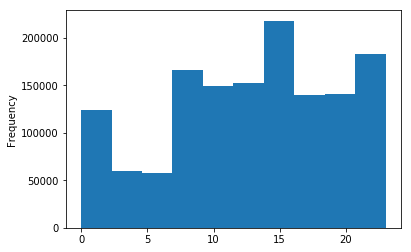

In [274]:
df['callstart'].dt.hour.plot

In [275]:
df['callHour'] = df['callstart'].dt.hour
df.head()

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed,idleTime,callHour
4411,20171230001230,1230,113992612,22344,2017-12-30 08:03:31,2017-12-30 08:08:51,2017-12-30 08:18:55,NaT,NaT,2017-12-30 09:00:28,...,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1,NaT,8
1745,20171230001812,1812,113993153,22344,2017-12-30 10:38:26,2017-12-30 10:42:50,2017-12-30 10:50:11,NaT,NaT,2017-12-30 11:31:43,...,0,0,C2,29.0,Traffic / Transportation Incidents,184,1,0,01:42:22,10
11021,20171230002065,2065,113993403,22344,2017-12-30 11:29:50,2017-12-30 11:32:03,2017-12-30 11:43:12,NaT,NaT,2017-12-30 13:16:37,...,0,0,C2,6.0,Breathing Problems,737,1,1,00:00:20,11
7535,20171230002819,2819,113994138,22344,2017-12-30 13:50:48,2017-12-30 14:15:12,2017-12-30 14:18:53,NaT,NaT,2017-12-30 14:55:59,...,0,0,C2,31.0,Unconscious / Fainting (Near),737,1,1,00:58:35,13
323,20171230003206,3206,113994327,22344,2017-12-30 15:00:03,2017-12-30 15:03:35,2017-12-30 15:10:46,NaT,NaT,2017-12-30 15:32:03,...,0,0,C1,24.0,Pregnancy / Childbirth / Miscarriage,1574,1,0,00:07:36,15


In [281]:
responsesGroupedbyHour = df.groupby('callHour')
avgResponseTimebyHour = df.groupby('callHour').mean()['response']

In [283]:
responseCountbyHour = responsesGroupedbyHour.count()['response']

Text(0.5,1,'Average Response Time by Hour of Day')

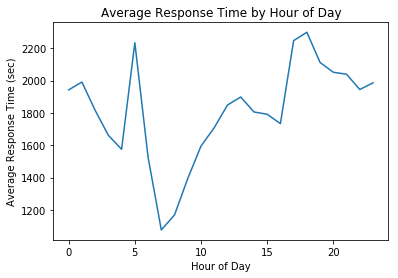

In [327]:
(avgResponseTimebyHour).plot()
plt.pyplot.ylabel('Average Response Time (sec)')
plt.pyplot.xlabel('Hour of Day')
plt.pyplot.title('Average Response Time by Hour of Day')

Text(0.5,1,'Average Response Time by Hour of Day')

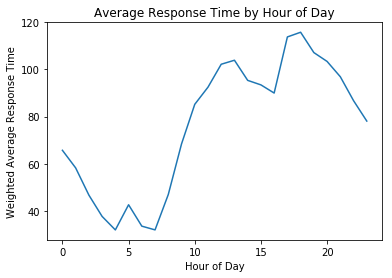

In [328]:
(avgResponseTimebyHour*responseCountbyHour/sum(responseCountbyHour)).plot()
plt.pyplot.ylabel('Weighted Average Response Time')
plt.pyplot.xlabel('Hour of Day')
plt.pyplot.title('Average Response Time by Hour of Day')

In [321]:
x = responses[(responses['wardID']=="00BJGJ")].sort_values(['lsoa'])

In [322]:
x[['lsoa','lat_activation','lon_activation','lat_incident','lon_incident']].drop_duplicates()

,lsoa,lat_activation,lon_activation,lat_incident,lon_incident
601,E01004551,51.485,-0.180,51.460,-0.175
58106,E01004551,51.425,-0.175,51.460,-0.175
60156,E01004551,51.480,-0.185,51.460,-0.175
62851,E01004551,51.460,-0.190,51.460,-0.175
62852,E01004551,51.455,-0.145,51.460,-0.175
64620,E01004551,51.455,-0.195,51.460,-0.170
64621,E01004551,51.460,-0.170,51.460,-0.170
66451,E01004551,51.460,-0.170,51.460,-0.175
67319,E01004551,51.420,-0.180,51.460,-0.175
69718,E01004551,51.475,-0.110,51.460,-0.175
